In [3]:
import pandas as pd
import numpy as np
from itertools import chain
import re
from tqdm import tqdm_notebook


In [4]:
freq_terms = pd.read_csv('term_freq_sorted.tsv', sep = '\t')
freq_terms = freq_terms.drop(columns = ['Unnamed: 0'])

In [5]:
data = pd.read_csv('terms_rubrics_nostopwords.csv', sep = '\t')

In [6]:
data.head()

,Unnamed: 0,Genre,Rubric,Terms
0,0,Статьи,Науки о земле,"['соленость', 'моно', 'фламинго', 'мышьяк', 'х..."
1,1,Статьи,История,"['телега', 'ямник', 'скелет', 'позвоночник', '..."
2,2,Статьи,Физиология человека,"['хромосома', 'деление', 'анеуплоидия', 'яйцек..."
3,3,Статьи,Физика,"['достоверность', 'сигма', 'коллайдер', 'убежд..."
4,4,Статьи,Космос,"['хондрит', 'пришелец', 'ахондрит']"


In [7]:
terms = []

reg_term = re.compile(r'[а-я]+')

for term_sting in data['Terms']:
    terms.append(reg_term.findall(term_sting))
    

In [8]:
freq_dict = dict(zip(freq_terms['Term'][:30], freq_terms['Freq'][:30]))

In [9]:
freq_dict

{'разработчик': 1612,
 'гипотеза': 1435,
 'орбита': 1387,
 'астроном': 1231,
 'археолог': 1078,
 'робот': 1057,
 'соцсеть': 1001,
 'марс': 986,
 'запуск': 960,
 'бактерия': 892,
 'днк': 884,
 'биолог': 863,
 'электрон': 826,
 'ноль': 799,
 'толщина': 675,
 'телескоп': 674,
 'обнаружение': 671,
 'излучение': 664,
 'иллюстрация': 614,
 'прототип': 613,
 'галактика': 610,
 'насекомое': 608,
 'смартфон': 603,
 'нейрон': 573,
 'останки': 571,
 'мкс': 562,
 'биология': 549,
 'раскопка': 527,
 'мутация': 514,
 'водород': 508}

In [10]:
#top = list(freq_terms['Term'])[:20]

In [11]:
top_from_rubrics = ['гипотеза', 'орбита', 'астроном', 'археолог', 'робот', 'соцсеть', 'бактерия', 'днк', 'биолог', 'электрон', 'ноль', 'телескоп', 'излучение', 'иллюстрация', 'прототип', 'галактика', 'насекомое', 'смартфон', 'нейрон', 'останки', 'мкс', 'биология', 'раскопка', 'мутация', 'водород', 'фотон', 'химик', 'аналог', 'белка', 'датчик', 'протон', 'зонд', 'лазер', 'популяция', 'гравитация', 'мор', 'радиус', 'фермент', 'юпитер', 'хищник', 'сми', 'аналогия', 'генетик', 'максимум', 'астероид', 'прима', 'математик', 'модуль', 'обезьяна', 'млекопитающее', 'импульс', 'комета', 'перемещение', 'суша', 'доброволец', 'потомство', 'космонавт', 'медик', 'вакуум', 'палеонтолог', 'детектор', 'испытуемый', 'траектория', 'плутон', 'кристалл', 'электрод', 'скелет', 'дальность', 'экспериментатор', 'вычисление', 'особь', 'древность', 'аккумулятор', 'углерод', 'азот', 'комбинация', 'патент', 'печень', 'ион', 'выброс', 'распад', 'изобретатель', 'взлет', 'нейтрон', 'рецептор', 'заряд', 'поселение', 'бак', 'социолог', 'сервис', 'программист', 'захоронение', 'антрополог', 'размножение']

In [12]:
top = top_from_rubrics[:40]

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

from itertools import combinations
from sklearn.preprocessing import LabelEncoder

In [14]:
le = LabelEncoder().fit(np.hstack(top))

N = le.classes_.shape[0]

In [15]:
A = np.zeros((N,N))

for text in tqdm_notebook(terms):
    for i in range(len(top)):
        for j in range(len(top)):
            if i != j:
                if top[i] in text and top[j] in text:
                        A[i][j] += 1
                        A[j][i] += 1
            else:
                continue
                
                

In [29]:
A_filtered = np.zeros((N, N))

for i in range(N):
    for j in range(N):
        if A[i][j] < 100:
            A_filtered[i][j] = 0
        else:
            A_filtered[i][j] = A[i][j]
    

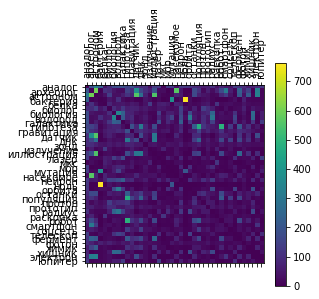

In [33]:
plt.matshow(A)

plt.colorbar()
#plt.figure(figsize=(10, 10))

plt.xticks(np.arange(N), le.classes_, rotation=90)
plt.yticks(np.arange(N), le.classes_)

#plt.show()
plt.savefig('top40_from_rubrics.pdf', dpi = 'figure', papertype = 'a4',
            bbox_inches='tight', pad_inches=2.0, frameon=True)

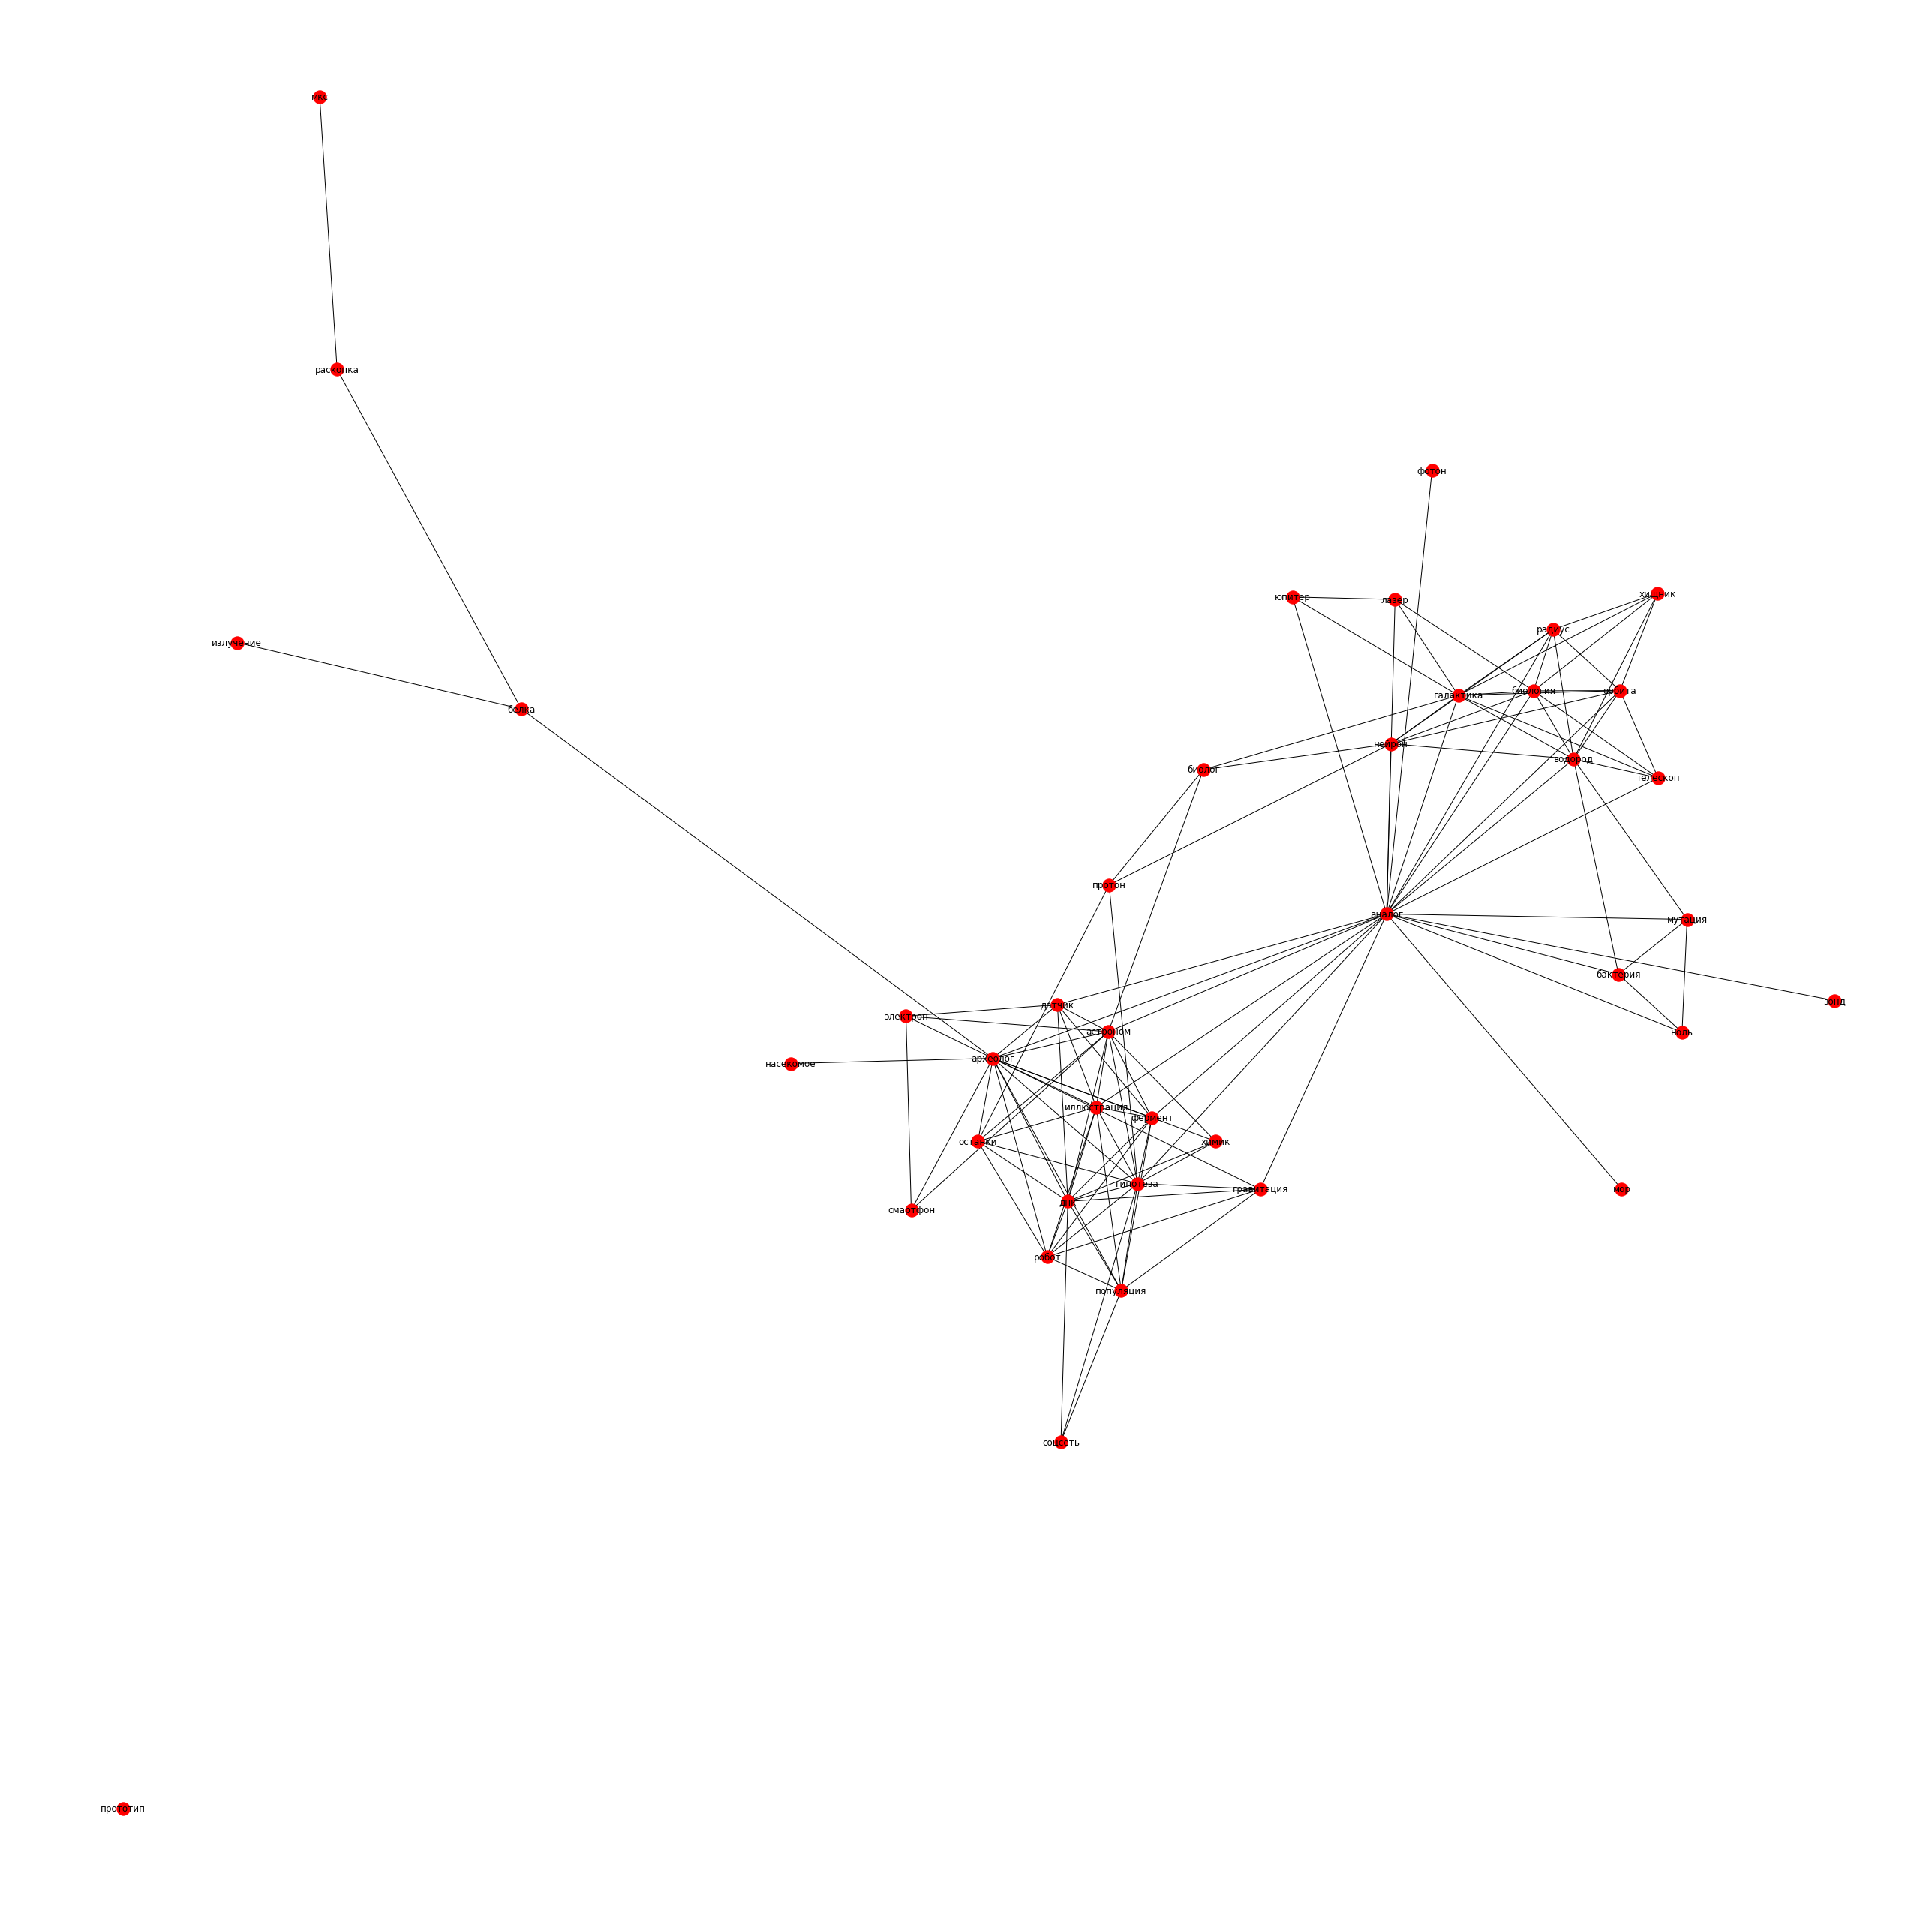

In [32]:
import networkx as nx

G = nx.Graph(A_filtered/A_filtered.max())

plt.figure(figsize=(35, 35))
nx.draw(G, labels = dict(zip(range(N), le.classes_)), with_labels = True)
#plt.show()
plt.savefig('top40_graph_filter100.pdf', dpi = 'figure', papertype = 'a4',
            bbox_inches='tight', pad_inches=2.0, frameon=True)

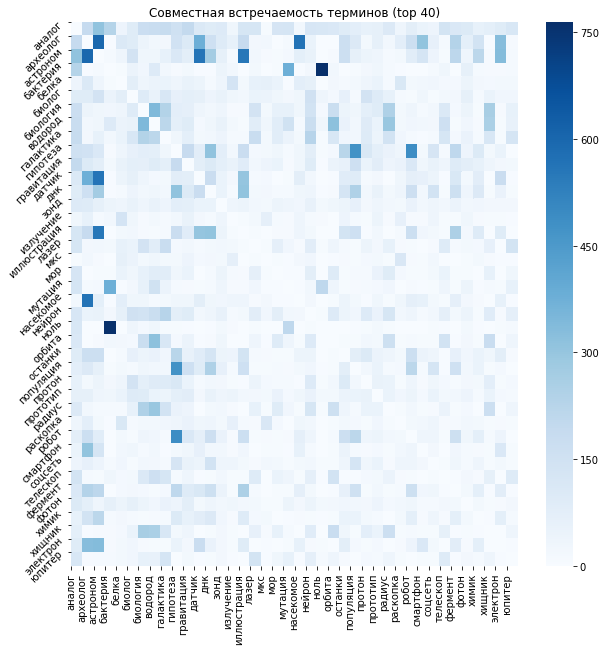

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 10))
sns.heatmap(data=A, cmap = "Blues")

plt.title("Совместная встречаемость терминов (top 40)")
plt.xticks(np.arange(N), le.classes_, rotation=90)
plt.yticks(np.arange(N), le.classes_, rotation = 45)
#plt.show()
plt.savefig('top40_from_rubrics.pdf', dpi = 'figure', papertype = 'a4',
            bbox_inches='tight', pad_inches=2.0, frameon=True)